In [6]:
import pickle
import cv2
import numpy as np

# perform camera calibration, image distortion correction and return the undistorted image
def cam_cal(images, nx, ny):
    
    # Arrays to store object points and image points from all the images
    objpoints = [] # 3D points in real world space
    imgpoints = [] # 2D points in image plane
    
    
    # Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ...., (7,5,0)
    objp = np.zeros((ny*nx, 3), np.float32)
    objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2) #x, y coordinates
    
    # Go through all images
    for img in images:
        im = cv2.imread(img)

        # Convert image to grayscale
        gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

        # If found, draw corners
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
    
    # Using cv2.calibrateCamera()
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    
    
    return mtx, dist



In [13]:
def plt2img(img1, img2):
    #plt.imshow(img1)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    
    # Image 1
    ax1.imshow(img1)
    ax1.set_title('Image 1', fontsize=50)
    
    # Image 2
    ax2.imshow(img2)
    ax2.set_title('Image 2', fontsize=50)
    
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()

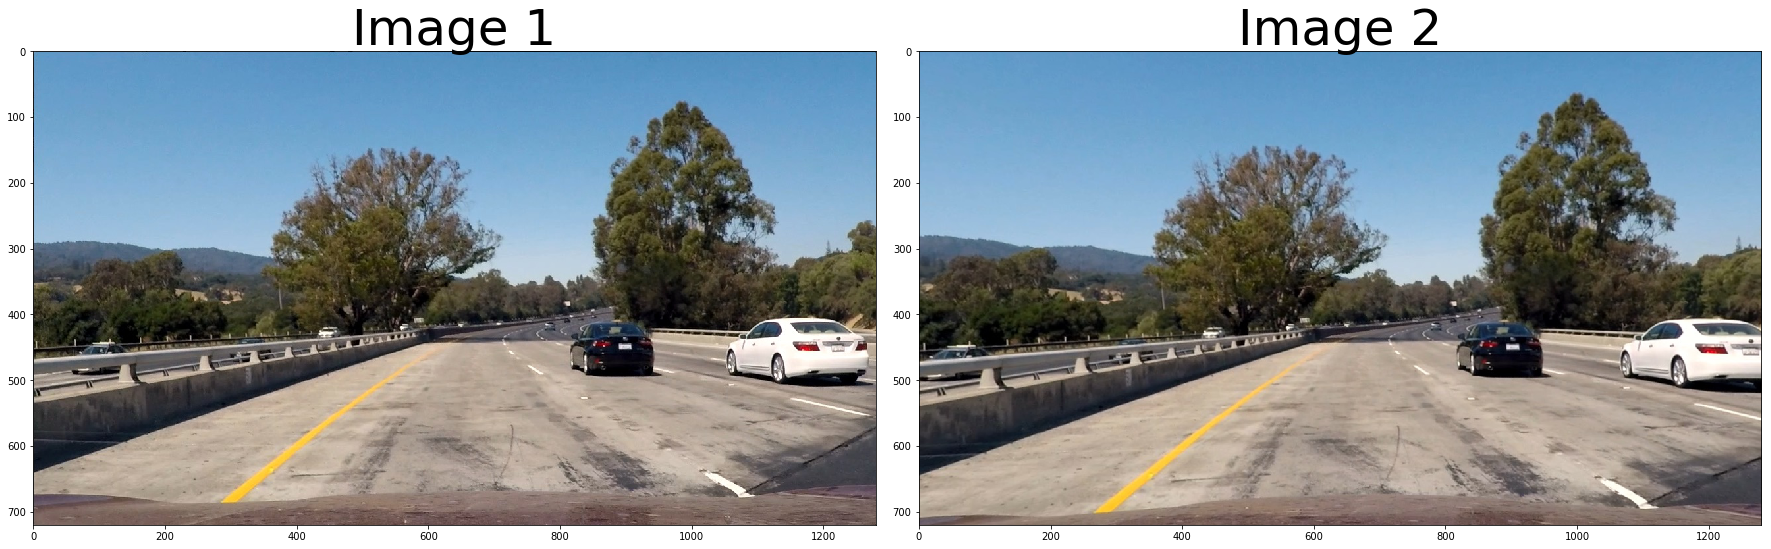

In [15]:
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Read in an image
images = glob.glob('./camera_cal/calibration*.jpg')

# Calibrate camera
mtx, dist = cam_cal(images, nx = 9, ny = 6)

# Load test image
img =  mpimg.imread('./test_images/test1.jpg')

# Undistort image
undist = cv2.undistort(img, mtx, dist, None, mtx)

# Plot result
plt2img(img, undist)